# Rotation Invariance of Corner Detection (4x4 Example)

This notebook demonstrates that the **eigenvalues of the structure tensor** (used in corner detection)
are invariant to image rotation. We use a very simple **4×4 image** with a bright 2×2 block in the top-left corner.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Sobel filters
Sx = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]], dtype=float)
Sy = np.array([[-1,-2,-1],
               [ 0, 0, 0],
               [ 1, 2, 1]], dtype=float)

def conv2d(img, k):
    H, W = img.shape
    out = np.zeros_like(img, dtype=float)
    pad = 1
    P = np.pad(img, ((pad,pad),(pad,pad)), mode='constant', constant_values=0.0)
    for r in range(H):
        for c in range(W):
            out[r,c] = np.sum(P[r:r+3, c:c+3] * k)
    return out

def structure_tensor(Ix, Iy, r0=1, c0=1, h=2, w=2):
    win_x = Ix[r0:r0+h, c0:c0+w]
    win_y = Iy[r0:r0+h, c0:c0+w]
    Sxx = np.sum(win_x**2)
    Syy = np.sum(win_y**2)
    Sxy = np.sum(win_x*win_y)
    M = np.array([[Sxx, Sxy],
                  [Sxy, Syy]], dtype=float)
    return M


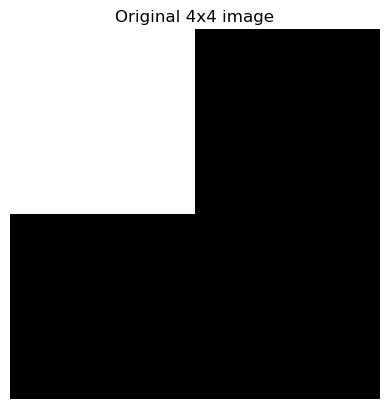

Original image matrix:
 [[255 255   0   0]
 [255 255   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]


In [2]:
# Original 4x4 image with a bright 2x2 block in top-left
I = np.array([[255, 255,   0,   0],
              [255, 255,   0,   0],
              [  0,   0,   0,   0],
              [  0,   0,   0,   0]], dtype=float)

plt.imshow(I, cmap='gray', vmin=0, vmax=255)
plt.title("Original 4x4 image")
plt.axis("off")
plt.show()

print("Original image matrix:\n", I.astype(int))


In [3]:
Ix = conv2d(I, Sx)
Iy = conv2d(I, Sy)
M = structure_tensor(Ix, Iy)

evals, evecs = np.linalg.eig(M)

print("Ix (original):\n", Ix.astype(int))
print("\nIy (original):\n", Iy.astype(int))
print("\nStructure tensor M (original):\n", M.astype(int))
print("\nEigenvalues (original):", np.sort(evals))
print("Eigenvectors (columns, original):\n", evecs)


Ix (original):
 [[ 765 -765 -765    0]
 [ 765 -765 -765    0]
 [ 255 -255 -255    0]
 [   0    0    0    0]]

Iy (original):
 [[ 765  765  255    0]
 [-765 -765 -255    0]
 [-765 -765 -255    0]
 [   0    0    0    0]]

Structure tensor M (original):
 [[1300500 1040400]
 [1040400 1300500]]

Eigenvalues (original): [ 260100. 2340900.]
Eigenvectors (columns, original):
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


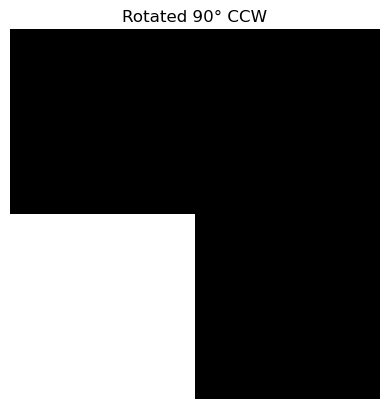

Rotated image matrix:
 [[  0   0   0   0]
 [  0   0   0   0]
 [255 255   0   0]
 [255 255   0   0]]


In [4]:
I_rot = np.rot90(I)
plt.imshow(I_rot, cmap='gray', vmin=0, vmax=255)
plt.title("Rotated 90° CCW")
plt.axis("off")
plt.show()

print("Rotated image matrix:\n", I_rot.astype(int))


In [5]:
Ix_r = conv2d(I_rot, Sx)
Iy_r = conv2d(I_rot, Sy)
M_r = structure_tensor(Ix_r, Iy_r)

evals_r, evecs_r = np.linalg.eig(M_r)

print("Ix (rotated):\n", Ix_r.astype(int))
print("\nIy (rotated):\n", Iy_r.astype(int))
print("\nStructure tensor M_rot (rotated):\n", M_r.astype(int))
print("\nEigenvalues (rotated):", np.sort(evals_r))
print("Eigenvectors (columns, rotated):\n", evecs_r)

print("\nDo eigenvalues match (rotation invariance)?",
      np.allclose(np.sort(evals), np.sort(evals_r), rtol=1e-9, atol=1e-12))


Ix (rotated):
 [[   0    0    0    0]
 [ 255 -255 -255    0]
 [ 765 -765 -765    0]
 [ 765 -765 -765    0]]

Iy (rotated):
 [[   0    0    0    0]
 [ 765  765  255    0]
 [ 765  765  255    0]
 [-765 -765 -255    0]]

Structure tensor M_rot (rotated):
 [[ 1300500 -1040400]
 [-1040400  1300500]]

Eigenvalues (rotated): [ 260100. 2340900.]
Eigenvectors (columns, rotated):
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

Do eigenvalues match (rotation invariance)? True
